In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 16,
    })


from fiesta.train.Benchmarker import Benchmarker
from fiesta.inference.lightcurve_model import AfterglowFlux, BullaLightcurveModel

In [2]:
def high_error_fraction(test, pred, filt):
    err = np.max(np.abs(test[filt]-pred[filt]), axis=1)

    err = err[(~np.isnan(err)) & (~np.isinf(err))]

    return np.sum(err >1) / len(err)
    

## Bu2025  CVAE vs. MLP

In [ ]:
FILTERS = ["besselli", "bessellv", "bessellux"]


model1 = AfterglowFlux("Bu2025_MLP",
                        filters = FILTERS)

model2 = AfterglowFlux("Bu2025_CVAE",
                        filters = FILTERS)


benchmarker1 = Benchmarker(
                    model = model1,
                    data_file = "/home/aya/work/hkoehn/fiesta/fiesta/surrogates/KN/_training_data/Bu2025_raw_data.h5",
                    metric_name = "L2"
                    )

benchmarker2 = Benchmarker(
                    model = model2,
                    data_file = "/home/aya/work/hkoehn/fiesta/fiesta/surrogates/KN/_training_data/Bu2025_raw_data.h5",
                    metric_name = "L2"
                    )

13:45 fiesta INFO    : Loading surrogate Bu2025_MLP. This surrogate should only be used in the following parameter ranges:
13:45 fiesta INFO    : 	 log10_mej_dyn: (-3.0, -1.3010299956639813)
13:45 fiesta INFO    : 	 v_ej_dyn: (0.12, 0.28)
13:45 fiesta INFO    : 	 Ye_dyn: (0.15, 0.35)
13:45 fiesta INFO    : 	 log10_mej_wind: (-2.0, -0.8860566476931633)
13:45 fiesta INFO    : 	 v_ej_wind: (0.05, 0.15)
13:45 fiesta INFO    : 	 Ye_wind: (0.2, 0.4)
13:45 fiesta INFO    : 	 inclination_EM: (0.0, 1.5707963267948966)
13:45 fiesta INFO    : Surrogate Bu2025_MLP is loading with source-frame time range [ 0.19405578 27.52765949] days.
13:45 fiesta INFO    : Surrogate Bu2025_MLP is loading with the following filters: ['besselli', 'bessellv', 'bessellux'].
13:45 fiesta INFO    : Loaded for surrogate Bu2025_MLP from /nfs/aya/work/hkoehn/fiesta/fiesta/src/fiesta/surrogates/KN/Bu2025_MLP/model.
13:45 fiesta INFO    : Loading surrogate Bu2025_CVAE. This surrogate should only be used in the following par

Loaded filters are: ['besselli', 'bessellv', 'bessellux'].


NameError: name 'benchmarker1' is not defined

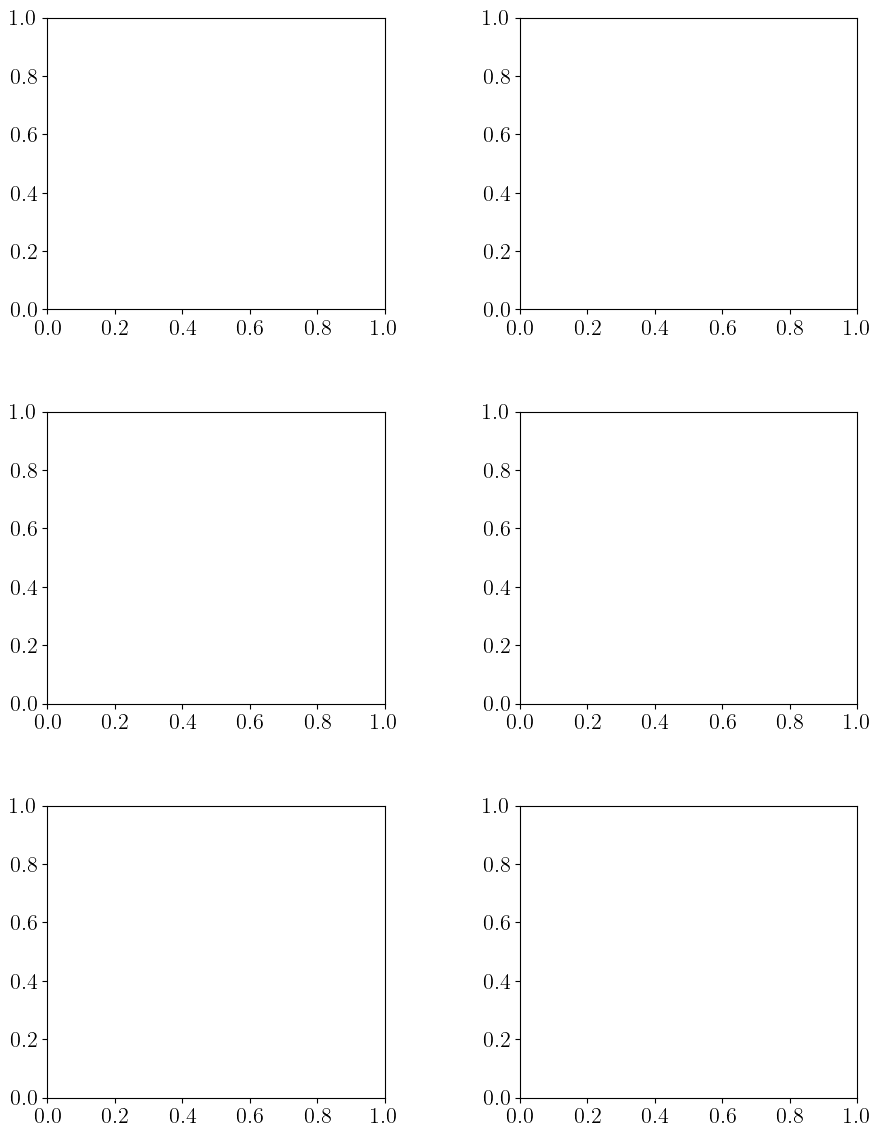

In [4]:
fig, ax = plt.subplots(3, 2, figsize = (9, 12))
fig.subplots_adjust(wspace = 0.4, hspace =0.35, bottom = 0.05, top = 0.95, left = 0.05, right = 0.95)

for filter, cax in zip(FILTERS, ax[:,0]):

    cax.hist(benchmarker1.error[filter], color = "blue", histtype = "step", bins = np.linspace(0, 1, 20), density = True, label = "MLP")
    cax.hist(benchmarker2.error[filter], color = "green", histtype = "step", bins = np.linspace(0, 1, 20), density = True, label = "cVAE")
    cax.set_yticks([])
    cax.set_xlabel("root mean square error in mag")
    cax.set_xlim((0,1))
    cax.set_title(filter, loc = "left")

for filter, cax in zip(FILTERS, ax[:,1]):
    error = np.abs(benchmarker1.pred_mag[filter] - benchmarker1.test_mag[filter])
    error[np.isinf(error) | np.isnan(error)] = 0.
    indices = np.linspace(10, len(model1.times)-5, 6).astype(int)
    parts1 = cax.violinplot(error[:, indices], positions=np.log10(model1.times[indices]), widths=0.25, side="low", showextrema=False, points=500)
    for pc in parts1["bodies"]:
        pc.set_facecolor("blue")
        pc.set_edgecolor("blue")

    error = np.abs(benchmarker2.pred_mag[filter] - benchmarker2.test_mag[filter])
    error[np.isinf(error) | np.isnan(error)] = 0.
    indices = np.linspace(10, len(model2.times)-5, 6).astype(int)
    parts2 = cax.violinplot(error[:, indices], positions=np.log10(model2.times[indices]), widths=0.25, side="high", showextrema=False, points=500)
    for pc in parts2["bodies"]:
        pc.set_facecolor("green")
        pc.set_edgecolor("green")

    cax.set(xlabel = "$\\log_{10}(t)$ in days", ylabel = "mismatch in mag", xscale = "linear", xlim = (-0.5, np.log10(20)), ylim = (0,1))

ax[0,0].legend(fancybox=False, framealpha=1, fontsize = 16)
fig.savefig("./benchmark_Bu2025.pdf", dpi =300)

# Bu2025 lc vs. MLP

In [3]:
FILTERS = ["besselli", "bessellv", "bessellux"]


model1 = AfterglowFlux("Bu2025_MLP",
                        filters = FILTERS)

model2 = BullaLightcurveModel("Bu2025",
                              filters = FILTERS)


benchmarker1 = Benchmarker(
                    model = model1,
                    data_file = "/home/aya/work/hkoehn/fiesta/fiesta/surrogates/KN/_training_data/Bu2025_raw_data.h5",
                    metric_name = "L2"
                    )

benchmarker2 = Benchmarker(
                    model = model2,
                    data_file = "/home/aya/work/hkoehn/fiesta/fiesta/surrogates/KN/_training_data/Bu2025_raw_data.h5",
                    metric_name = "L2"
                    )

13:46 fiesta INFO    : Loading surrogate Bu2025_MLP. This surrogate should only be used in the following parameter ranges:
13:46 fiesta INFO    : 	 log10_mej_dyn: (-3.0, -1.3010299956639813)
13:46 fiesta INFO    : 	 v_ej_dyn: (0.12, 0.28)
13:46 fiesta INFO    : 	 Ye_dyn: (0.15, 0.35)
13:46 fiesta INFO    : 	 log10_mej_wind: (-2.0, -0.8860566476931633)
13:46 fiesta INFO    : 	 v_ej_wind: (0.05, 0.15)
13:46 fiesta INFO    : 	 Ye_wind: (0.2, 0.4)
13:46 fiesta INFO    : 	 inclination_EM: (0.0, 1.5707963267948966)
13:46 fiesta INFO    : Surrogate Bu2025_MLP is loading with source-frame time range [ 0.19405578 27.52765949] days.
13:46 fiesta INFO    : Surrogate Bu2025_MLP is loading with the following filters: ['besselli', 'bessellv', 'bessellux'].
13:46 fiesta INFO    : Loaded for surrogate Bu2025_MLP from /nfs/aya/work/hkoehn/fiesta/fiesta/src/fiesta/surrogates/KN/Bu2025_MLP/model.
13:46 fiesta INFO    : Loading surrogate Bu2025. This surrogate should only be used in the following paramete

Loaded filters are: ['besselli', 'bessellv', 'bessellux'].
Loaded filters are: ['besselli', 'bessellv', 'bessellux'].


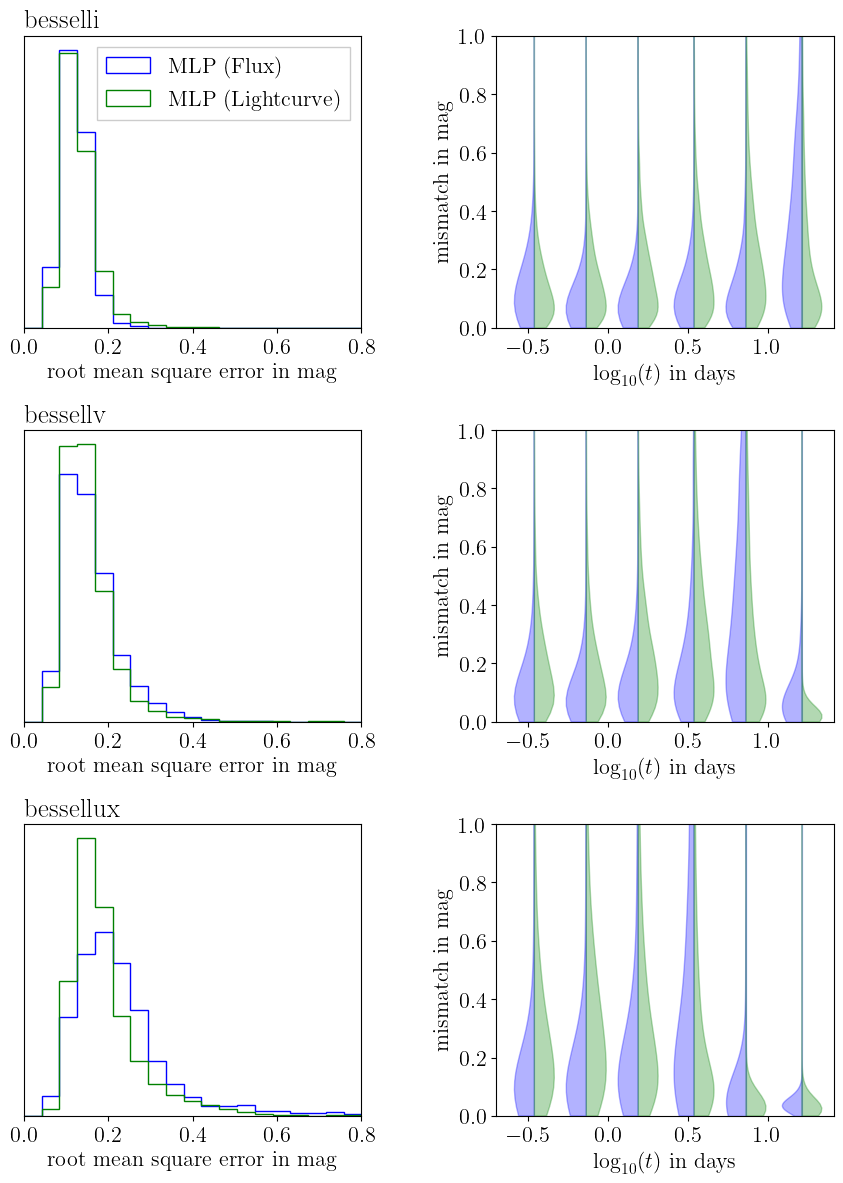

In [4]:
fig, ax = plt.subplots(3, 2, figsize = (9, 12))
fig.subplots_adjust(wspace = 0.4, hspace =0.35, bottom = 0.05, top = 0.95, left = 0.05, right = 0.95)

for filter, cax in zip(FILTERS, ax[:,0]):

    cax.hist(benchmarker1.error[filter], color = "blue", histtype = "step", bins = np.linspace(0, 0.8, 20), density = True, label = "MLP (Flux)")
    cax.hist(benchmarker2.error[filter], color = "green", histtype = "step", bins = np.linspace(0, 0.8, 20), density = True, label = "MLP (Lightcurve)")
    cax.set_yticks([])
    cax.set_xlabel("root mean square error in mag")
    cax.set_xlim((0,0.8))
    cax.set_title(filter, loc = "left")

for filter, cax in zip(FILTERS, ax[:,1]):
    error = np.abs(benchmarker1.pred_mag[filter] - benchmarker1.test_mag[filter])
    error[np.isinf(error) | np.isnan(error)] = 0.
    indices = np.linspace(10, len(model1.times)-10, 6).astype(int)
    parts1 = cax.violinplot(error[:, indices], positions=np.log10(model1.times[indices]), widths=0.25, side="low", showextrema=False, points=500)
    for pc in parts1["bodies"]:
        pc.set_facecolor("blue")
        pc.set_edgecolor("blue")

    error = np.abs(benchmarker2.pred_mag[filter] - benchmarker2.test_mag[filter])
    error[np.isinf(error) | np.isnan(error)] = 0.
    indices = np.linspace(10, len(model2.times)-10, 6).astype(int)
    parts2 = cax.violinplot(error[:, indices], positions=np.log10(model2.times[indices]), widths=0.25, side="high", showextrema=False, points=500)
    for pc in parts2["bodies"]:
        pc.set_facecolor("green")
        pc.set_edgecolor("green")

    cax.set(xlabel = "$\\log_{10}(t)$ in days", ylabel = "mismatch in mag", xscale = "linear", xlim = (-0.7, np.log10(26)), ylim = (0,1))

ax[0,0].legend(fancybox=False, framealpha=1, fontsize = 16)
fig.savefig("./benchmark_Bu2025.pdf", dpi =300)

In [26]:
high_error_fraction(benchmarker1.test_mag, benchmarker1.pred_mag, "bessellux")

0.9320822162645219

In [10]:
np.argsort(np.abs(benchmarker1.test_mag["bessellux"][:,49] - benchmarker1.pred_mag["bessellux"][:,49]))[-20:]

array([1963,  443, 1193,  184,  417,  834, 1062,   86, 1375,   36,  664,
        171, 1493,  811,  591,  134,  905,  632,  854,  450])

In [17]:
np.sort(np.abs(benchmarker1.test_mag["bessellux"][:,49] - benchmarker1.pred_mag["bessellux"][:,49]))[-20:]

array([3.0073833, 3.0280628, 3.0694828, 3.0902004, 3.0997543, 3.1486492,
       3.1740475, 3.2252407, 3.2368717, 3.2815933, 3.3247643, 3.3455982,
       3.3482914, 3.352108 , 3.462658 , 3.5388584, 3.5665455, 3.7937145,
       4.729954 , 5.5270615], dtype=float32)

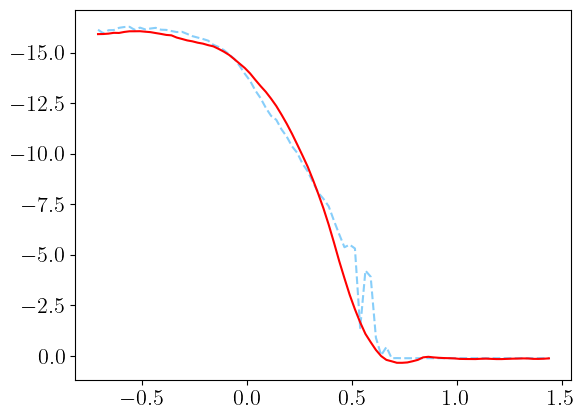

In [20]:
plt.plot(np.log10(benchmarker1.times), benchmarker1.test_mag["bessellux"][1963], color="lightskyblue", linestyle="dashed")
plt.plot(np.log10(benchmarker1.times), benchmarker1.pred_mag["bessellux"][1963], color="red")
plt.gca().invert_yaxis()

In [6]:
benchmarker1.test_mag["bessellv"].shape

(2238, 87)